In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from typing import List, Dict

**Data Exploration**

In [3]:
vg_df = pd.read_csv("Video_Games.csv")

In [4]:
print(len(vg_df))
print(len(vg_df.columns))

16928
17


In [5]:
print(vg_df.head())

   index                      Name Platform  Year_of_Release         Genre  \
0      0                Wii Sports      Wii           2006.0        Sports   
1      1         Super Mario Bros.      NES           1985.0      Platform   
2      2            Mario Kart Wii      Wii           2008.0        Racing   
3      3         Wii Sports Resort      Wii           2009.0        Sports   
4      4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   

   Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0          76.0          5

In [6]:
print(f"Features: {len(vg_df.columns)}")
print(vg_df.columns)
print(vg_df.dtypes)

Features: 17
Index(['index', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')
index                int64
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


**Visualizations**

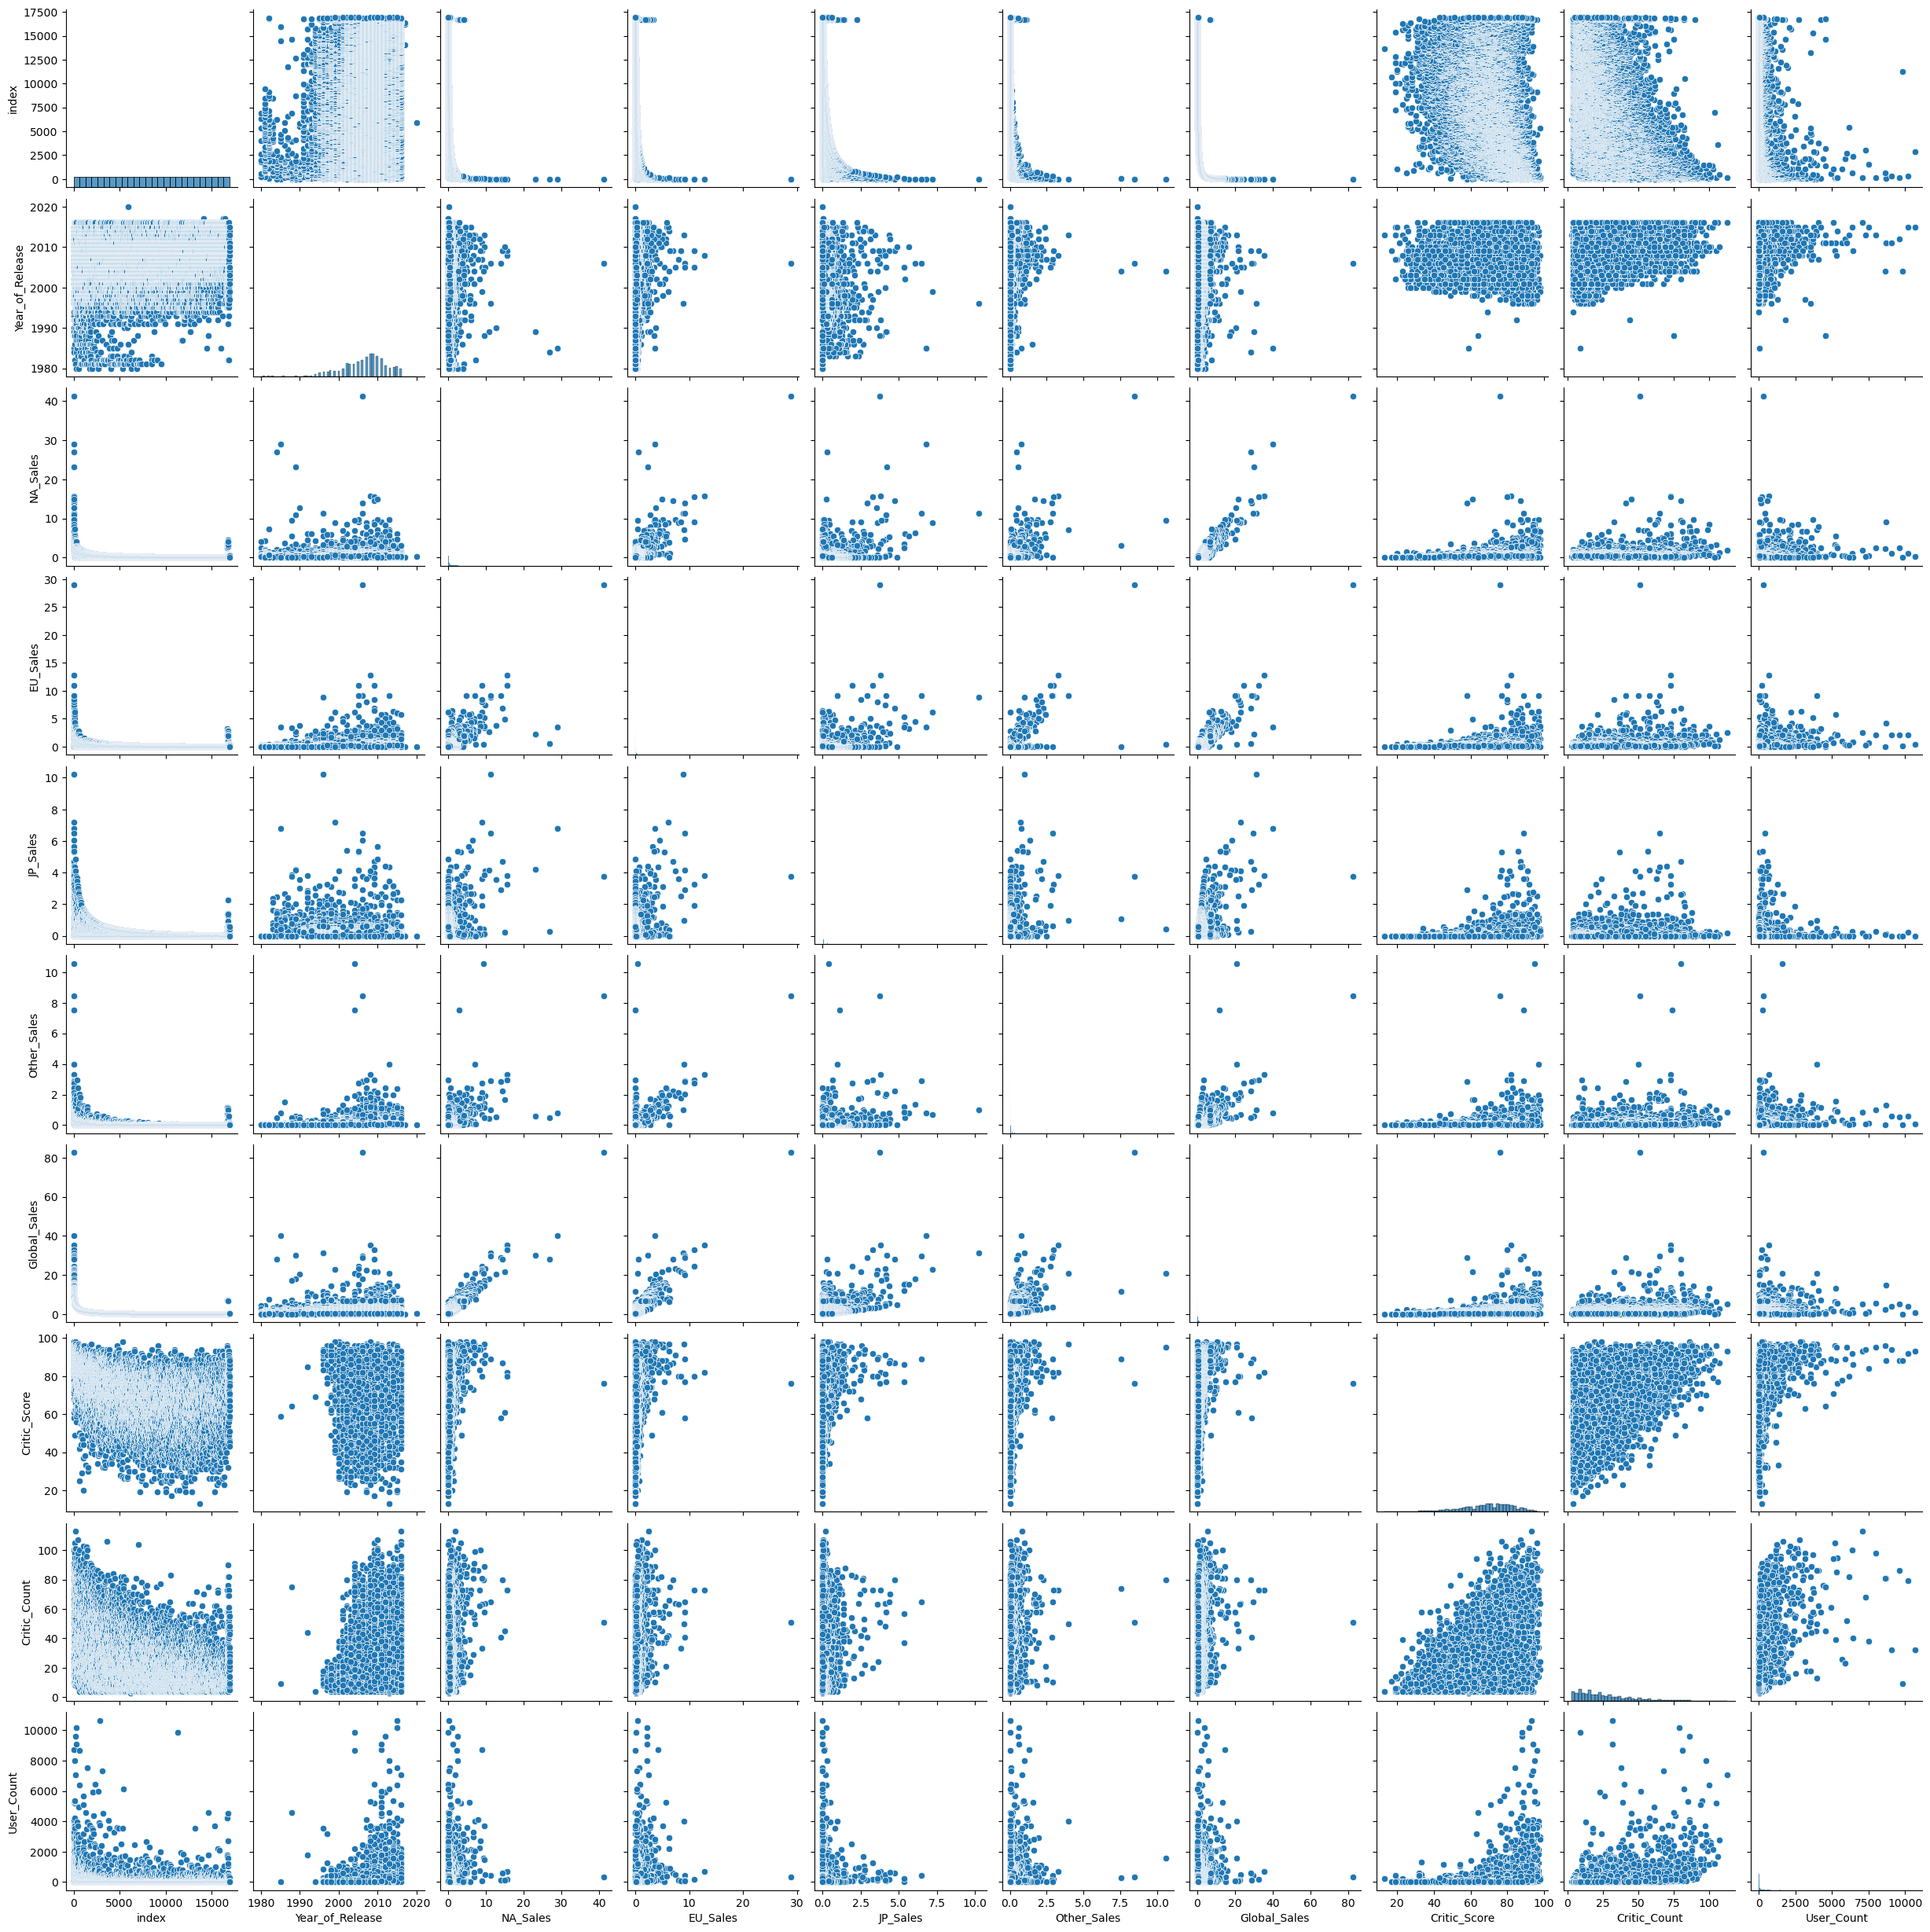

In [8]:
sns.pairplot(vg_df)

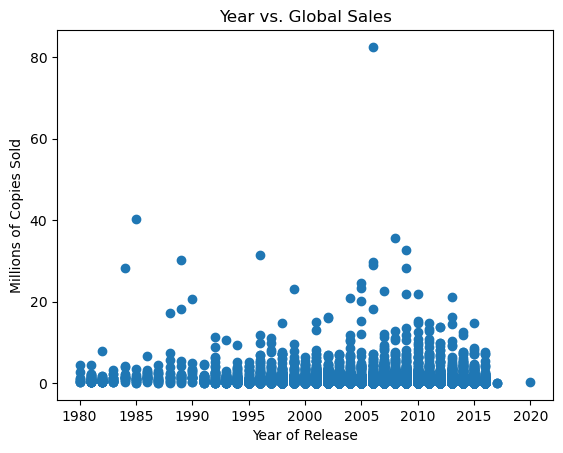

In [9]:
plt.scatter(vg_df['Year_of_Release'], vg_df['Global_Sales'])
plt.xlabel("Year of Release")
plt.ylabel("Millions of Copies Sold")
plt.title("Year vs. Global Sales")
plt.show()

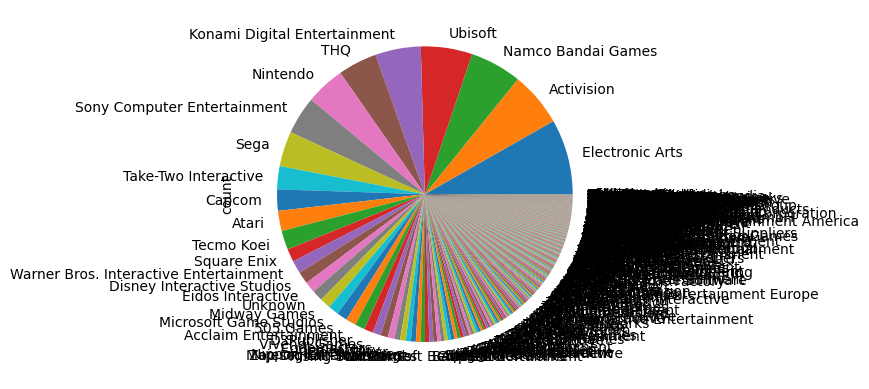

In [10]:
pub_counts = vg_df['Publisher'].value_counts()
pub_counts.plot.pie()
plt.show()

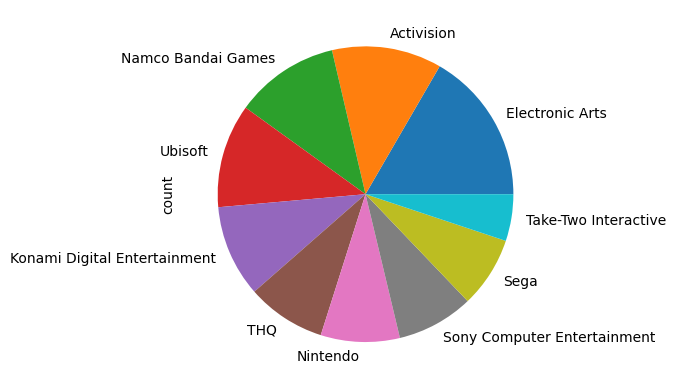

In [11]:
#many publishers
pub_counts[:10].plot.pie()
#pub_counts[0:10].plot.pie()
plt.show()

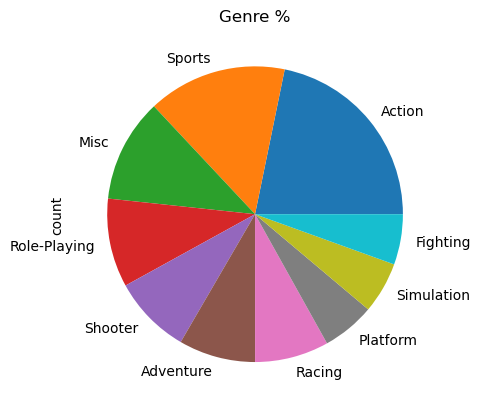

In [12]:
genre_counts = vg_df['Genre'].value_counts()
genre_counts[0:10].plot.pie()
plt.title("Genre %")
plt.show()

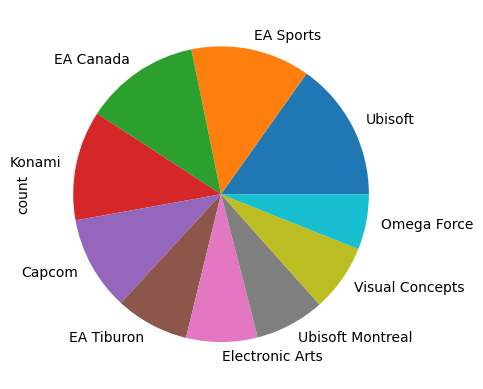

In [13]:
dev_counts = vg_df['Developer'].value_counts()
dev_counts[0:10].plot.pie()
plt.show()

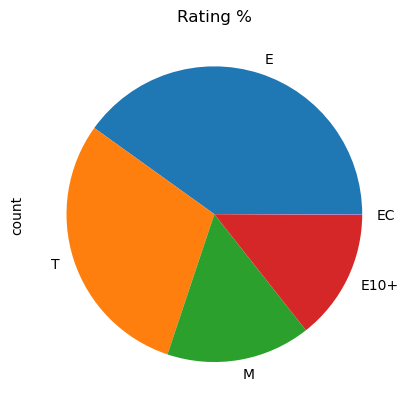

In [14]:
rating_counts = vg_df['Rating'].value_counts()
rating_counts[0:5].plot.pie()
plt.title("Rating %")
plt.show()

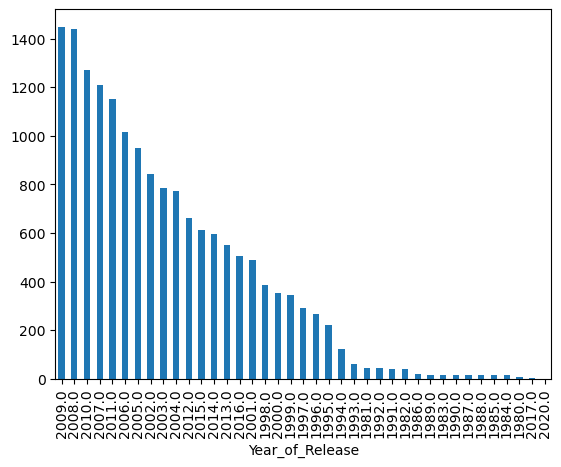

In [15]:
year_counts = vg_df['Year_of_Release'].value_counts()
year_counts.plot.bar(year_counts, vg_df['Year_of_Release'])

plt.show()

**Preprocessing**

In [17]:
print(vg_df.isna().sum())

index                 0
Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count         9210
Developer          6688
Rating             6836
dtype: int64


In [18]:
print(len(vg_df) - 8668)
print(len(vg_df) - 6836)
#can keep rating, dev, user_score

8260
10092


In [19]:
print(vg_df['Critic_Score'])

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16923    43.0
16924    51.0
16925    64.0
16926    88.0
16927     NaN
Name: Critic_Score, Length: 16928, dtype: float64


In [20]:
print(vg_df['User_Score'])

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16923    3.6
16924    7.8
16925    7.4
16926    8.8
16927    NaN
Name: User_Score, Length: 16928, dtype: object


In [21]:
#giveaway sales numbers
vg_df = vg_df.drop(['index', 'Other_Sales', 'JP_Sales', 'EU_Sales', 'NA_Sales'], axis=1)

In [22]:
vg_df = vg_df.drop(['Critic_Score', 'Critic_Count', 'User_Count'], axis=1)

In [23]:
vg_df = vg_df.drop(['Name'], axis=1)

In [24]:
vg_df = vg_df.dropna()

In [25]:
print(vg_df.isna().sum())

Platform           0
Year_of_Release    0
Genre              0
Publisher          0
Global_Sales       0
User_Score         0
Developer          0
Rating             0
dtype: int64


In [26]:
print(vg_df)

      Platform  Year_of_Release     Genre          Publisher  Global_Sales  \
0          Wii           2006.0    Sports           Nintendo         82.53   
2          Wii           2008.0    Racing           Nintendo         35.52   
3          Wii           2009.0    Sports           Nintendo         32.77   
6           DS           2006.0  Platform           Nintendo         29.80   
7          Wii           2006.0      Misc           Nintendo         28.92   
...        ...              ...       ...                ...           ...   
16922       GC           2001.0    Racing           Nintendo          0.60   
16923      PS3           2013.0   Shooter               Sega          0.60   
16924      PS2           2003.0  Fighting  Eidos Interactive          0.60   
16925      PS3           2011.0   Shooter               Sega          0.60   
16926       XB           2005.0  Fighting    Electronic Arts          0.60   

      User_Score              Developer Rating  
0             

In [27]:
print(vg_df.dtypes)

Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
Global_Sales       float64
User_Score          object
Developer           object
Rating              object
dtype: object


In [28]:
print(vg_df['Platform'].nunique())
print(vg_df['Genre'].nunique())
print(vg_df['Publisher'].nunique())
print(vg_df['Developer'].nunique())
print(vg_df['Rating'].nunique())


17
12
328
1643
8


In [29]:
#vg_df = pd.read_csv("Video_Games.csv")
print(vg_df['Genre'])

0          Sports
2          Racing
3          Sports
6        Platform
7            Misc
           ...   
16922      Racing
16923     Shooter
16924    Fighting
16925     Shooter
16926    Fighting
Name: Genre, Length: 9844, dtype: object


In [30]:

genre_num = 0
genre_dict = {}
for genre in vg_df['Genre']:
    if (genre_dict.get(genre) == None):
        genre_dict[genre] = genre_num
        genre_num += 1
print(genre_dict)

{'Sports': 0, 'Racing': 1, 'Platform': 2, 'Misc': 3, 'Action': 4, 'Puzzle': 5, 'Shooter': 6, 'Fighting': 7, 'Simulation': 8, 'Role-Playing': 9, 'Adventure': 10, 'Strategy': 11}


In [31]:
# I acknowledge the use of AI to find the 'map' method. Full acknowledgement at end.
# Same map method used for all categroical features

vg_df['Genre'] = vg_df['Genre'].map(genre_dict)



In [32]:
print(vg_df['Genre'])
print(vg_df['Genre'].nunique())

0        0
2        1
3        0
6        2
7        3
        ..
16922    1
16923    6
16924    7
16925    6
16926    7
Name: Genre, Length: 9844, dtype: int64
12


In [33]:
platform_num = 0
platform_dict = {}
for platform in vg_df['Platform']:
    if (platform_dict.get(platform) == None):
        platform_dict[platform] = platform_num
        platform_num += 1

vg_df['Platform'] = vg_df['Platform'].map(platform_dict)

In [34]:
print(vg_df['Platform'])
print(vg_df['Platform'].nunique())

0         0
2         0
3         0
6         1
7         0
         ..
16922    12
16923     3
16924     4
16925     3
16926     8
Name: Platform, Length: 9844, dtype: int64
17


In [35]:
pub_num = 0
pub_dict = {}
for pub in vg_df['Publisher']:
    if (pub_dict.get(pub) == None):
        pub_dict[pub] = pub_num
        pub_num += 1

vg_df['Publisher'] = vg_df['Publisher'].map(pub_dict)

In [36]:
print(vg_df['Publisher'])
print(vg_df['Publisher'].nunique())

0         0
2         0
3         0
6         0
7         0
         ..
16922     0
16923    26
16924    21
16925    26
16926     7
Name: Publisher, Length: 9844, dtype: int64
328


In [37]:
dev_num = 0
dev_dict = {}
for dev in vg_df['Developer']:
    if (dev_dict.get(dev) == None):
        dev_dict[dev] = dev_num
        dev_num += 1

vg_df['Developer'] = vg_df['Developer'].map(dev_dict)

In [38]:
print(vg_df['Developer'])
print(vg_df['Developer'].nunique())

0          0
2          0
3          0
6          0
7          0
        ... 
16922      0
16923     99
16924    494
16925    352
16926     17
Name: Developer, Length: 9844, dtype: int64
1643


In [39]:
rating_num = 0
rating_dict = {}
for rating in vg_df['Rating']:
    if (rating_dict.get(rating) == None):
        rating_dict[rating] = rating_num
        rating_num += 1

vg_df['Rating'] = vg_df['Rating'].map(rating_dict)

In [40]:
print(vg_df['Rating'])
print(vg_df['Rating'].nunique())

0        0
2        0
3        0
6        0
7        0
        ..
16922    0
16923    1
16924    1
16925    1
16926    2
Name: Rating, Length: 9844, dtype: int64
8


In [41]:
print(vg_df.dtypes)

Platform             int64
Year_of_Release    float64
Genre                int64
Publisher            int64
Global_Sales       float64
User_Score          object
Developer            int64
Rating               int64
dtype: object


In [42]:
vg_df = vg_df[vg_df['User_Score'] != 'tbd']

vg_df['User_Score'] = vg_df['User_Score'].astype(float)



In [43]:
vg_df

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,User_Score,Developer,Rating
0,0,2006.0,0,0,82.53,8.0,0,0
2,0,2008.0,1,0,35.52,8.3,0,0
3,0,2009.0,0,0,32.77,8.0,0,0
6,1,2006.0,2,0,29.80,8.5,0,0
7,0,2006.0,3,0,28.92,6.6,0,0
...,...,...,...,...,...,...,...,...
16922,12,2001.0,1,0,0.60,8.3,0,0
16923,3,2013.0,6,26,0.60,3.6,99,1
16924,4,2003.0,7,21,0.60,7.8,494,1
16925,3,2011.0,6,26,0.60,7.4,352,1


In [44]:
# Citation: logistic regression homework
# This code is very similar to the set creation code found in the previous logistic regression homework assignment

from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1,1), X_tst, y_tst.reshape(-1,1)

In [45]:
y = vg_df['Global_Sales'].values
X = vg_df.drop('Global_Sales', axis=1).values



In [46]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)

In [47]:
#bias
X_trn = np.hstack([np.ones(shape=(X_trn.shape[0], 1)), X_trn]) 
X_vld = np.hstack([np.ones(shape=(X_vld.shape[0], 1)), X_vld])
X_tst = np.hstack([np.ones(shape=(X_tst.shape[0], 1)), X_tst])

**Modeling**

In [49]:
# Citation: OLS homework
# This code is very similar to the OLS model definition code found in the previous derivatives and OLS homework assignment

class OrdinaryLeastSquares():
    def __init__(self):
        self.w  = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        self.w = np.linalg.pinv(X.T @ X) @ X.T @ y
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        y_hat = X @ self.w
        return y_hat

In [50]:
#Citation for np.arange: ("numpy.arange")

def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:

    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = []
    for i in range(0, data_len, batch_size):
        batches.append(indices[i : i + batch_size])
        
    return batches

In [51]:
#Citation: LMS homework
# This code is very similar to the least mean squares model definition code found in the previous gradient descent and least mean squares homework assignment

class LeastMeanSquares():


    def __init__(
        self, 
        alpha: float ,
        batch_size: int,
        seed: int = 0,
        epochs: int = 1,
    ):
        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        self.w: np.ndarray = None
        self.trn_error: list = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> object:

        np.random.seed(self.seed)

        self.trn_error = []

        self.w = np.random.rand(X.shape[1], 1)
        
        # Loop over training epochs
        for e in range(self.epochs):
            batches = []
            batches = get_batches(X.shape[0], self.batch_size)

            # Loop over batched data indices
            for b in batches:
                mean_grad = (1/len(b)) * ((X[b]).T @ (X[b] @ self.w - y[b])) #column vector version
                self.w = self.w - (self.alpha * mean_grad)

            # Compute training error for current epoch
            preds = self.predict(X)
            trn_error = rmse(y, preds)
            self.trn_error.append(trn_error)
            
        return self
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        return np.array(X @ self.w)

In [52]:
# Citation: OLS homework
# This code is very similar to the error metric function definitions code found in the previous derivatives and OLS homework assignment

#metrics

def sse(y: np.ndarray, y_hat: np.ndarray) -> float:
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency
    residuals = y_hat - y
    residuals_squared = residuals ** 2
    
    return np.sum(residuals_squared)
    

def mse(y: np.ndarray, y_hat: np.ndarray) -> float:
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency
    result_sse = sse(y_hat, y)
    
    return result_sse * (1/y.shape[0])

def rmse(y: np.ndarray, y_hat: np.ndarray) -> float:
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency
    result_mse = mse(y_hat, y)

    return np.sqrt(result_mse)


In [53]:
#model creation

ols = OrdinaryLeastSquares()
ols.fit(X_trn, y_trn)


In [54]:
#online batch

lms = LeastMeanSquares(alpha=.0000001, #any larger learning rate causes runtime error
        batch_size=1, 
        epochs=30,
        seed=42)
lms.fit(X_trn, y_trn)

In [55]:
y_hat_ols_vld = ols.predict(X_vld)
y_hat_ols_tst = ols.predict(X_tst)
y_hat_lms_vld = lms.predict(X_vld)
y_hat_lms_tst = lms.predict(X_tst)

**Evaluation**

In [57]:
#SSE
print("SSE\nOLS:")

print(f"VLD: {sse(y_vld, y_hat_ols_vld)}")
print(f"TST: {sse(y_tst, y_hat_ols_tst)}")

print("\nLMS:")

print(f"VLD: {sse(y_vld, y_hat_lms_vld)}")
print(f"TST: {sse(y_tst, y_hat_lms_tst)}")

SSE
OLS:
VLD: 2493.628678044135
TST: 9595.158054356201

LMS:
VLD: 21193.61629444392
TST: 32930.26794036369


In [58]:
#MSE
print("MSE\nOLS:")

print(f"VLD: {mse(y_vld, y_hat_ols_vld)}")
print(f"TST: {mse(y_tst, y_hat_ols_tst)}")

print("\nLMS:")

print(f"VLD: {mse(y_vld, y_hat_lms_vld)}")
print(f"TST: {mse(y_tst, y_hat_lms_tst)}")

MSE
OLS:
VLD: 2.0762936536587304
TST: 6.392510362662359

LMS:
VLD: 17.646641377555305
TST: 21.938886036218314


In [59]:
#RMSE
print("RMSE\nOLS:")

print(f"VLD: {rmse(y_vld, y_hat_ols_vld)}")
print(f"TST: {rmse(y_tst, y_hat_ols_tst)}")

print("\nLMS:")

print(f"VLD: {rmse(y_vld, y_hat_lms_vld)}")
print(f"TST: {rmse(y_tst, y_hat_lms_tst)}")

RMSE
OLS:
VLD: 1.440934992863568
TST: 2.5283414252553706

LMS:
VLD: 4.200790565781078
TST: 4.683896458742264


**lms tuning**

In [61]:
print(f"VLD: {rmse(y_vld, y_hat_lms_vld)}")
print(f"TST: {rmse(y_tst, y_hat_lms_tst)}")

#lower alpha
lms = LeastMeanSquares(alpha=.00000001, 
        batch_size=1, 
        epochs=30,
        seed=42)
lms.fit(X_trn, y_trn)
y_hat_lms_vld = lms.predict(X_vld)
y_hat_lms_tst = lms.predict(X_tst)
print(f"VLD: {rmse(y_vld, y_hat_lms_vld)}")
print(f"TST: {rmse(y_tst, y_hat_lms_tst)}")



VLD: 4.200790565781078
TST: 4.683896458742264
VLD: 5.039304064850341
TST: 5.407096194902206


In [62]:
# worse, takes longer

#minibatching
lms = LeastMeanSquares(alpha=.0000001,
        batch_size=32, 
        epochs=30,
        seed=42)
lms.fit(X_trn, y_trn)
y_hat_lms_vld = lms.predict(X_vld)
y_hat_lms_tst = lms.predict(X_tst)
print(f"VLD: {rmse(y_vld, y_hat_lms_vld)}")
print(f"TST: {rmse(y_tst, y_hat_lms_tst)}")

VLD: 5.8947584653924
TST: 6.486945248799902


In [63]:
#not as good as online

#full batch
lms = LeastMeanSquares(alpha=.0000001,
        batch_size=len(X_trn), 
        epochs=30,
        seed=42)
lms.fit(X_trn, y_trn)
y_hat_lms_vld = lms.predict(X_vld)
y_hat_lms_tst = lms.predict(X_tst)
print(f"VLD: {rmse(y_vld, y_hat_lms_vld)}")
print(f"TST: {rmse(y_tst, y_hat_lms_tst)}")

VLD: 19.080109450952335
TST: 19.10783966814825


In [64]:
#not as good as online

#epoch change
lms = LeastMeanSquares(alpha=.0000001,
        batch_size=1, 
        epochs=70,
        seed=42)
lms.fit(X_trn, y_trn)
y_hat_lms_vld = lms.predict(X_vld)
y_hat_lms_tst = lms.predict(X_tst)
print(f"VLD: {rmse(y_vld, y_hat_lms_vld)}")
print(f"TST: {rmse(y_tst, y_hat_lms_tst)}")

VLD: 3.305322255489664
TST: 3.8907297841119055


In [65]:
#epoch change
lms = LeastMeanSquares(alpha=.0000001,
        batch_size=1, 
        epochs=20,
        seed=42)
lms.fit(X_trn, y_trn)
y_hat_lms_vld = lms.predict(X_vld)
y_hat_lms_tst = lms.predict(X_tst)
print(f"VLD: {rmse(y_vld, y_hat_lms_vld)}")
print(f"TST: {rmse(y_tst, y_hat_lms_tst)}")

VLD: 4.494550301815762
TST: 4.958677733856898


In [66]:
#better, but takes longer

#epoch change
lms = LeastMeanSquares(alpha=.0000001,
        batch_size=1, 
        epochs=80,
        seed=42)
lms.fit(X_trn, y_trn)
y_hat_lms_vld = lms.predict(X_vld)
y_hat_lms_tst = lms.predict(X_tst)
print(f"VLD: {rmse(y_vld, y_hat_lms_vld)}")
print(f"TST: {rmse(y_tst, y_hat_lms_tst)}")

VLD: 3.7752855821064184
TST: 4.232198920230911


In [67]:
#RMSE
print("RMSE\nOLS:")

print(f"VLD: {rmse(y_vld, y_hat_ols_vld)}")
print(f"TST: {rmse(y_tst, y_hat_ols_tst)}")

print("\nLMS:")

print(f"VLD: {rmse(y_vld, y_hat_lms_vld)}")
print(f"TST: {rmse(y_tst, y_hat_lms_tst)}")

RMSE
OLS:
VLD: 1.440934992863568
TST: 2.5283414252553706

LMS:
VLD: 3.7752855821064184
TST: 4.232198920230911


**Acknowledgements**

	I, Matthew Edwards, acknowledge the use of AI in completion of this project, specifically ChatGPT. I will proceed to explain how and where I used AI.
	A major part of preprocessing was converting categorical features into numerical equivalents. The first feature I attempted to convert was the ‘Genre’ feature. First, I created a dictionary that created entries for each category which mapped to their own number. Each category was assigned numbers sequentially from zero. Then I attempted to use this dictionary for conversion. I tried to use methods like one hot encoding and converting the data frame into NumPy arrays, but these were not working. I implemented a for-loop shown below, but it was not producing the right output.
    
for i in range(len(vg_df['Genre'])):
 vg_df.loc[i, 'Genre'] = genre_dict.get(vg_df.loc[i, 'Genre'])
 
I kept receiving error messages of ‘KeyError: 1’. I presented my objective and current code to ChatGPT for assistance. 
-The prompt: I am trying to change every category in a pandas data frame feature according to a dictionary. for i in range(len(vg_df['Genre'])): vg_df.loc[i, 'Genre'] = genre_dict.get(vg_df.loc[i, 'Genre'])

•	The response: You're on the right track, but that code is inefficient and can cause issues, especially with large DataFrames. Here's the cleanest and most efficient way to update a pandas column using a dictionary:

•	✅ Best Practice — Use map():
o	vg_df['Genre'] = vg_df['Genre'].map(genre_dict)
o	This applies the genre_dict mapping to each value in the 'Genre' column.
o	Unmatched values will be replaced with NaN.
Works Cited
Devastator, The. Video Game Sales and Ratings. Version 2.0, Kaggle, 2024, www.kaggle.com/datasets/thedevastator/video-game-sales-and-ratings.
Lee, Minwoo and Hongfei Xue. “Gradient Descent and Least Mean Squares”. ITCS 3156, University of North Carolina at Charlotte, 2025. Course Lecture.
Lee, Minwoo and Hongfei Xue. “Linear Regression”. ITCS 3156, University of North Carolina at Charlotte, 2025. Course Lecture.
“pandas”. pandas.DataFrame.map, 2024, pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html.

I search for this pandas method and found the documentation page (“pandas”). I then replaced my previous code with the suggested, and it worked as intended. Each genre category name was changed to its corresponding number in the genre dictionary. I used this same map method for the other 4 categorical features in preprocessing.


**Works Cited**

Devastator, *The. Video Game Sales and Ratings*. Version 2.0, Kaggle, 2024, www.kaggle.com/datasets/thedevastator/video-game-sales-and-ratings.

Lee, Minwoo and Hongfei Xue. “Gradient Descent and Least Mean Squares”. ITCS 3156, University of North Carolina at Charlotte, 2025. Course Lecture.

Lee, Minwoo and Hongfei Xue. “Linear Regression”. ITCS 3156, University of North Carolina at Charlotte, 2025. Course Lecture.

"numpy.arange". *NumPy*, 2024, numpy.org/doc/2.1/reference/generated/numpy.arange.html.

“pandas”. *pandas.DataFrame.map*, 2024, pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html.
